# Call fortran from Python

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import scipy.fftpack as sf
import scipy.linalg as sl
import numpy as np

In [2]:
import sys
%env FC=gfortran
if sys.platform == "darwin":
    %env CC=gcc-10
# change values for your configuration

env: FC=gfortran


## f2py
f2py is a part of Numpy and there are three ways to wrap Fortran with Python :
- Write some fortran subroutines and just run f2py to create Python modules.
- Insert special f2py directives inside Fortran source for complex wrapping.
- Write a interface file (.pyf) to wrap Fortran files without changing them. f2py automatically generate the pyf template file that can be modified. 

# Simple Fortran subroutine to compute norm
   
### Fortran 90/95 free format

In [3]:
%%file euclidian_norm.f90
subroutine euclidian_norm (a, b, c)
  real(8), intent(in) :: a, b
  real(8), intent(out) :: c 
  c =	sqrt (a*a+b*b) 
end subroutine euclidian_norm

Writing euclidian_norm.f90


### Fortran 77 fixed format

In [4]:
%%file euclidian_norm.f
      subroutine euclidian_norm (a, b, c)
      real*8 a,b,c
Cf2py intent(out) c
      c = sqrt (a*a+b*b) 
      end 

Writing euclidian_norm.f


# Build extension module with f2py program


In [5]:
import sys
!{sys.executable} -m numpy.f2py -c euclidian_norm.f90 -m vect  --fcompiler=gnu95 --f90flags=-O3

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "vect" sources
f2py options: []
f2py:> /tmp/tmp85hgxga_/src.linux-x86_64-3.8/vectmodule.c
creating /tmp/tmp85hgxga_/src.linux-x86_64-3.8
Reading fortran codes...
	Reading file 'euclidian_norm.f90' (format:free)
Post-processing...
	Block: vect
			Block: euclidian_norm
Post-processing (stage 2)...
Building modules...
	Building module "vect"...
		Constructing wrapper function "euclidian_norm"...
		  c = euclidian_norm(a,b)
	Wrote C/API module "vect" to file "/tmp/tmp85hgxga_/src.linux-x86_64-3.8/vectmodule.c"
  adding '/tmp/tmp85hgxga_/src.linux-x86_64-3.8/fortranobject.c' to sources.
  adding '/tmp/tmp85hgxga_/src.linux-x86_64-3.8' to include_dirs.
copying /usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/f2p

In file included from /usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1822:0,
                 from /usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /tmp/tmp85hgxga_/src.linux-x86_64-3.8/fortranobject.h:13,
                 from /tmp/tmp85hgxga_/src.linux-x86_64-3.8/fortranobject.c:2:
/usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it with " \
  ^~~~~~~
In file included from /usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1822:0,
          

compiling Fortran sources
Fortran f77 compiler: /usr/bin/gfortran -Wall -g -ffixed-form -fno-second-underscore -fPIC -O3 -funroll-loops
Fortran f90 compiler: /usr/bin/gfortran -O3 -fPIC -O3 -funroll-loops
Fortran fix compiler: /usr/bin/gfortran -Wall -g -ffixed-form -fno-second-underscore -O3 -fPIC -O3 -funroll-loops
compile options: '-I/tmp/tmp85hgxga_/src.linux-x86_64-3.8 -I/usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/core/include -I/usr/share/miniconda3/envs/runenv/include/python3.8 -c'
gfortran:f90: euclidian_norm.f90


/usr/bin/gfortran -Wall -g -Wall -g -shared /tmp/tmp85hgxga_/tmp/tmp85hgxga_/src.linux-x86_64-3.8/vectmodule.o /tmp/tmp85hgxga_/tmp/tmp85hgxga_/src.linux-x86_64-3.8/fortranobject.o /tmp/tmp85hgxga_/euclidian_norm.o -L/usr/lib/gcc/x86_64-linux-gnu/7 -L/usr/lib/gcc/x86_64-linux-gnu/7 -lgfortran -o ./vect.cpython-38-x86_64-linux-gnu.so
Removing build directory /tmp/tmp85hgxga_


## Use the extension module in Python

In [6]:
import vect
c = vect.euclidian_norm(3,4)
c

5.0

In [7]:
print(vect.euclidian_norm.__doc__) # Docstring is automatically generate

c = euclidian_norm(a,b)

Wrapper for ``euclidian_norm``.

Parameters
----------
a : input float
b : input float

Returns
-------
c : float



# Fortran magic 

- Jupyter extension that help to use fortran code in an interactive session.
- It adds a %%fortran cell magic that compile and import the Fortran code in the cell, using F2py.
- The contents of the cell are written to a .f90 file in the directory IPYTHONDIR/fortran using a filename with the hash of the code. This file is then compiled. The resulting module is imported and all of its symbols are injected into the user's namespace.

[Documentation](http://nbviewer.jupyter.org/github/mgaitan/fortran_magic/blob/master/documentation.ipynb)

In [8]:
%load_ext fortranmagic

# F2py directives
- F2PY introduces also some extensions to Fortran 90/95 language specification that help designing Fortran to Python interface, make it more “Pythonic”.
- If editing Fortran codes is acceptable, these specific attributes can be inserted directly to Fortran source codes. Special comment lines are ignored by Fortran compilers but F2PY interprets them as normal lines.



In [9]:
%%fortran 
subroutine euclidian_norm(a,c,n) 
  integer :: n 
  real(8),dimension(n),intent(in) :: a
  !f2py optional , depend(a) :: n=len(a)
  real(8),intent(out) :: c 
  real(8) :: sommec 
  integer :: i
  sommec = 0 
  do i=1,n
    sommec=sommec+a( i )*a( i ) 
  end do
  c = sqrt (sommec) 
end subroutine euclidian_norm

In [10]:
a=[2,3,4]  # Python list
type(a)

list

In [11]:
euclidian_norm(a)

5.385164807134504

In [12]:
a=np.arange(2,5)  # numpy array
type(a)

numpy.ndarray

In [13]:
euclidian_norm(a)

5.385164807134504

In [14]:
print(euclidian_norm.__doc__) # Documentation

c = euclidian_norm(a,[n])

Wrapper for ``euclidian_norm``.

Parameters
----------
a : input rank-1 array('d') with bounds (n)

Other Parameters
----------------
n : input int, optional
    Default: len(a)

Returns
-------
c : float



# F2py directives
- `optional`: The corresponding argument is moved to the end.
- `required`: This is default. Use it to disable automatic optional setting.
- `intent(in | inout | out | hide)` , `intent(in)` is the default.
- `intent(out)` is implicitly translated to `intent(out,hide) `.
- `intent(copy)` and `intent(overwrite)` control changes for input arguments.
- `check` performs some assertions, it is often automatically generated.
- `depend`:  f2py detects cyclic dependencies.
- `allocatable, parameter`
- `intent(callback), external`: for function as arguments.
- `intent(c)` C-type argument , array or function.
- C expressions: `rank, shape, len, size, slen`.


# Callback

You can call a python function inside your fortran code


In [15]:
%%fortran
subroutine sum_f (f ,n, s) 
  !Compute sum(f(i), i=1,n) 
  external f 
  integer, intent(in) :: n 
  real, intent(out) :: s
  s = 0.0 
  do i=1,n
    s=s+f(i)
  end do 
end subroutine sum_f

In [16]:
def fonction(i) : # python function
    return i*i

sum_f(fonction,3) 

14.0

In [17]:
sum_f(lambda x :x**2,3) # lambda function

14.0

# Fortran arrays and Numpy arrays

Let's see how to pass numpy arrays to fortran subroutine.


In [18]:
%%fortran --extra "-DF2PY_REPORT_ON_ARRAY_COPY=1"
subroutine push( positions, velocities, dt, n)
  integer, intent(in) :: n
  real(8), intent(in) :: dt
  real(8), dimension(n,3), intent(in) :: velocities
  real(8), dimension(n,3) :: positions
  do i = 1, n
    positions(i,:) = positions(i,:) + dt*velocities(i,:)
  end do
end subroutine push

In [19]:
positions = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
velocities = [[0, 1, 2], [0, 3, 2], [0, 1, 3]]

In [20]:
import sys
push(positions, velocities, 0.1)
positions # memory is not updated because we used C memory storage

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

During execution, the message "created an array from object" is displayed, because a copy of is made when passing multidimensional array to fortran subroutine.

In [21]:
positions = np.array(positions, dtype='f8', order='F')
push(positions, velocities, 0.1)
positions # the memory is updated

array([[0. , 0.1, 0.2],
       [0. , 0.3, 0.2],
       [0. , 0.1, 0.3]])

# Signature file

This file contains descriptions of wrappers to Fortran or C functions, also called as signatures of the functions. F2PY can create initial signature file by scanning Fortran source codes and catching all relevant information needed to create wrapper functions.

```bash
f2py vector.f90 -h vector.pyf
```
- vector.pyf

```fortran
!    -*- f90 -*-
! Note: the context of this file is case sensitive.

subroutine euclidian_norm(a,c,n) ! in vector.f90
    real(kind=8) dimension(n),intent(in) :: a
    real(kind=8) intent(out) :: c
    integer optional,check(len(a)>=n),depend(a) :: n=len(a)
end subroutine euclidian_norm

! This file was auto-generated with f2py (version:2).
! See http://cens.ioc.ee/projects/f2py2e/
```


# Wrap lapack function dgemm  with f2py

- Generate the signature file

In [22]:
%rm -f dgemm.f dgemm.pyf
!wget http://ftp.mcs.anl.gov/pub/MINPACK-2/blas/dgemm.f

--2020-08-09 16:33:55--  http://ftp.mcs.anl.gov/pub/MINPACK-2/blas/dgemm.f
Resolving ftp.mcs.anl.gov (ftp.mcs.anl.gov)... 

140.221.6.23
Connecting to ftp.mcs.anl.gov (ftp.mcs.anl.gov)|140.221.6.23|:80... connected.
HTTP request sent, awaiting response... 

301 Moved Permanently
Location: https://ftp.mcs.anl.gov/pub/MINPACK-2/blas/dgemm.f [following]
--2020-08-09 16:33:56--  https://ftp.mcs.anl.gov/pub/MINPACK-2/blas/dgemm.f
Connecting to ftp.mcs.anl.gov (ftp.mcs.anl.gov)|140.221.6.23|:443... connected.


HTTP request sent, awaiting response... 

200 OK
Length: 9851 (9.6K) [text/plain]
Saving to: ‘dgemm.f’

dgemm.f             100%[===================>]   9.62K  --.-KB/s    in 0s      

2020-08-09 16:33:56 (228 MB/s) - ‘dgemm.f’ saved [9851/9851]



In [23]:
# %load dgemm.f

In [24]:
!{sys.executable} -m numpy.f2py -m mylapack --overwrite-signature -h dgemm.pyf dgemm.f

Reading fortran codes...
	Reading file 'dgemm.f' (format:fix,strict)
rmbadname1: Replacing "max" with "max_bn".


Post-processing...
	Block: mylapack
			Block: dgemm
Post-processing (stage 2)...
Saving signatures to file "./dgemm.pyf"


```fortran
!    -*- f90 -*-
! Note: the context of this file is case sensitive.

python module mylapack ! in 
    interface  ! in :mylapack
        subroutine dgemm(transa,transb,m,n,k,alpha,a,lda,b,ldb,beta,c,ldc) ! in :mylapack:dgemm.f
            character*1 :: transa
            character*1 :: transb
            integer :: m
            integer :: n
            integer :: k
            double precision :: alpha
            double precision dimension(lda,*) :: a
            integer, optional,check(shape(a,0)==lda),depend(a) :: lda=shape(a,0)
            double precision dimension(ldb,*) :: b
            integer, optional,check(shape(b,0)==ldb),depend(b) :: ldb=shape(b,0)
            double precision :: beta
            double precision dimension(ldc,*) :: c
            integer, optional,check(shape(c,0)==ldc),depend(c) :: ldc=shape(c,0)
        end subroutine dgemm
    end interface 
end python module mylapack

! This file was auto-generated with f2py (version:2).
! See http://cens.ioc.ee/projects/f2py2e/
```

In [25]:
!{sys.executable} -m numpy.f2py -c dgemm.pyf -llapack

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "mylapack" sources
creating /tmp/tmp44thhw01/src.linux-x86_64-3.8
f2py options: []
f2py: dgemm.pyf
Reading fortran codes...
	Reading file 'dgemm.pyf' (format:free)
Post-processing...
	Block: mylapack
			Block: dgemm
Post-processing (stage 2)...
Building modules...
	Building module "mylapack"...
		Constructing wrapper function "dgemm"...
getarrdims:warning: assumed shape array, using 0 instead of '*'
getarrdims:warning: assumed shape array, using 0 instead of '*'
getarrdims:warning: assumed shape array, using 0 instead of '*'
		  dgemm(transa,transb,m,n,k,alpha,a,b,beta,c,[lda,ldb,ldc])
	Wrote C/API module "mylapack" to file "/tmp/tmp44thhw01/src.linux-x86_64-3.8/mylapackmodule.c"
  adding '/tmp/tmp44thhw01/src.linux-x86_64-3

compile options: '-I/tmp/tmp44thhw01/src.linux-x86_64-3.8 -I/usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/core/include -I/usr/share/miniconda3/envs/runenv/include/python3.8 -c'
gcc: /tmp/tmp44thhw01/src.linux-x86_64-3.8/fortranobject.c
gcc: /tmp/tmp44thhw01/src.linux-x86_64-3.8/mylapackmodule.c


In file included from /usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1822:0,
                 from /usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /tmp/tmp44thhw01/src.linux-x86_64-3.8/fortranobject.h:13,
                 from /tmp/tmp44thhw01/src.linux-x86_64-3.8/fortranobject.c:2:
/usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it with " \
  ^~~~~~~
In file included from /usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1822:0,
          

/tmp/tmp44thhw01/src.linux-x86_64-3.8/mylapackmodule.c:142:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^~~~~~~~~


gcc -pthread -shared -B /usr/share/miniconda3/envs/runenv/compiler_compat -L/usr/share/miniconda3/envs/runenv/lib -Wl,-rpath=/usr/share/miniconda3/envs/runenv/lib -Wl,--no-as-needed -Wl,--sysroot=/ /tmp/tmp44thhw01/tmp/tmp44thhw01/src.linux-x86_64-3.8/mylapackmodule.o /tmp/tmp44thhw01/tmp/tmp44thhw01/src.linux-x86_64-3.8/fortranobject.o -llapack -o ./mylapack.cpython-38-x86_64-linux-gnu.so
Removing build directory /tmp/tmp44thhw01


In [26]:
import numpy as np
import mylapack
a = np.array([[7,8],[3,4],[1,2]])
b = np.array([[1,2,3],[4,5,6]])
print("a=",a) 
print("b=",b)
assert a.shape[1] == b.shape[0]
c = np.zeros((a.shape[0],b.shape[1]),'d',order='F')
mylapack.dgemm('N','N',a.shape[0],b.shape[1],a.shape[1],1.0,a,b,1.0,c)
print(c)
np.all(c == a @ b) # check with numpy matrix multiplication 

a= [[7 8]
 [3 4]
 [1 2]]
b= [[1 2 3]
 [4 5 6]]
[[39. 54. 69.]
 [19. 26. 33.]
 [ 9. 12. 15.]]


True

### Exercise 
- Modify the file dgemm.pyf to set all arguments top optional and keep only the two matrices as input.

In [27]:
# %load solutions/fortran/dgemm2.pyf

# Build the pythoni module

In [28]:
!{sys.executable} -m numpy.f2py -c dgemm2.pyf -llapack --f90flags=-O3

Traceback (most recent call last):
  File "/usr/share/miniconda3/envs/runenv/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/share/miniconda3/envs/runenv/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/f2py/__main__.py", line 4, in <module>
    main()
  File "/usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/f2py/f2py2e.py", line 692, in main
    run_compile()
  File "/usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/f2py/f2py2e.py", line 603, in run_compile
    modulename = get_f2py_modulename(f)
  File "/usr/share/miniconda3/envs/runenv/lib/python3.8/site-packages/numpy/distutils/command/build_src.py", line 763, in get_f2py_modulename
    with open(source) as f:
FileNotFoundError: [Errno 2] No such file or directory: 'dgemm2.pyf'


In [29]:
import mylapack2
a = np.array([[7,8],[3,4],[1,2]])
b = np.array([[1,2,3],[4,5,6]])
c = mylapack2.dgemm(a,b)
np.all( c == a @ b)

ModuleNotFoundError: No module named 'mylapack2'

## Check performance between numpy and mylapack

In [30]:
a = np.random.random((512,128))
b = np.random.random((128,512))

In [31]:
%timeit c = mylapack2.dgemm(a,b)

NameError: name 'mylapack2' is not defined

In [32]:
%timeit c = a @ b

1.39 ms ± 9.24 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Fortran arrays allocated in a subroutine share same memory in Python**

In [33]:
%%fortran
module f90module
   implicit none
   real(8), dimension(:),   allocatable :: farray
contains
   subroutine init( n ) !Allocation du tableau farray
   integer, intent(in) :: n
   allocate(farray(n))
   end subroutine init
end module f90module

In [34]:
f90module.init(10)
len(f90module.farray)

10

**Numpy arrays allocated in Python passed to Fortran are already allocated**

In [35]:
%%fortran
module f90module
   implicit none
   real(8), dimension(:),   allocatable :: farray
contains
   subroutine test_array( allocated_flag, array_size )
   logical, intent(out) :: allocated_flag
   integer, intent(out) :: array_size
   allocated_flag = allocated(farray)
   array_size = size(farray)
   end subroutine test_array
end module f90module

In [36]:
f90module.farray = np.random.rand(10).astype(np.float64)
f90module.test_array()

(1, 10)

# f2py + OpenMP



In [37]:
%env OMP_NUM_THREADS=4

env: OMP_NUM_THREADS=4


In [38]:
%%fortran 
subroutine hello( )
  integer :: i
  do i = 1, 4
    call sleep(1)
  end do
end subroutine

In [39]:
%%time
hello()

CPU times: user 21.8 ms, sys: 4.54 ms, total: 26.3 ms
Wall time: 4 s


In [40]:
%%fortran --f90flags "-fopenmp" --extra "-L/usr/local/lib -lgomp"
subroutine hello_omp( )
  integer :: i
  !$OMP PARALLEL PRIVATE(I)
  !$OMP DO 
  do i = 1, 4
    call sleep(1)
  end do
  !$OMP END DO
  !$OMP END PARALLEL

end subroutine

In [41]:
%%time
hello_omp()

CPU times: user 6.61 ms, sys: 158 µs, total: 6.77 ms
Wall time: 1 s


# Conclusions

- Easy to use, it works with modern fortran, legacy fortran and also C.
- Works with common and modules and arrays dynamically allocated.
- Python function callback can be very useful combined with Sympy
- Documentation is  automatically generated
- All fortran compilers are supported: GNU, Portland, Sun, Intel,...
- F2py is integrated in numpy library.

## cons 
- Derived types and fortran pointers are not well supported.
- Absolutely not compatible with fortran 2003-2008 new features (classes)
- f2py is maintained but not really improved. Development is stopped.

# distutils

## setup.py
```python
from numpy.distutils.core import Extension, setup
ext1 = Extension(name = 'scalar',
                 sources = ['scalar.f'])
ext2 = Extension(name = 'fib2',
                 sources = ['fib2.pyf','fib1.f'])

setup(name = 'f2py_example', ext_modules = [ext1,ext2])
```
Compilation
```bash
python3 setup.py build_ext --inplace
```

### Exercice: Laplace problem

- Replace the `laplace` function by a fortran subroutine

iterations =  2457


CPU times: user 32.2 s, sys: 382 ms, total: 32.6 s
Wall time: 32.2 s


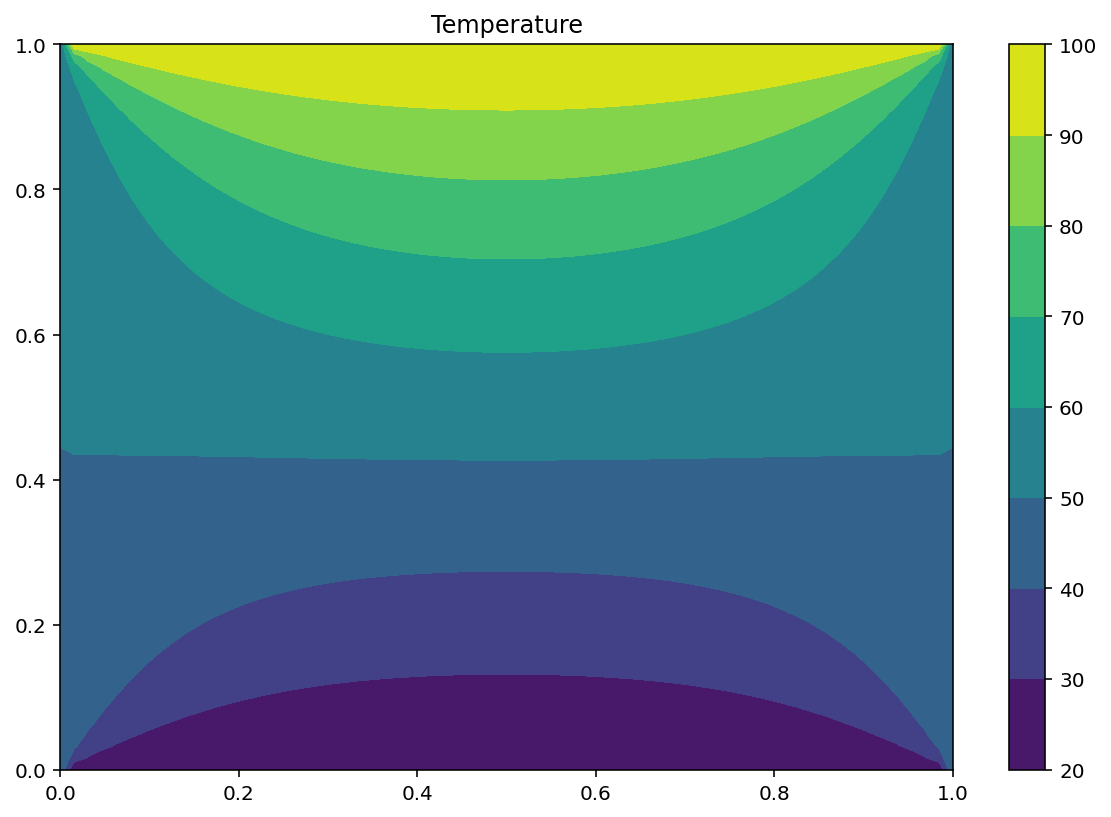

In [42]:
%%time
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import itertools
# Boundary conditions
Tnorth, Tsouth, Twest, Teast = 100, 20, 50, 50

# Set meshgrid
n, l = 64, 1.0
X, Y = np.meshgrid(np.linspace(0,l,n), np.linspace(0,l,n))
T = np.zeros((n,n))

# Set Boundary condition
T[n-1:, :] = Tnorth
T[:1, :] = Tsouth
T[:, n-1:] = Teast
T[:, :1] = Twest

def laplace(T, n):
    residual = 0.0
    for i in range(1, n-1):
        for j in range(1, n-1):
            T_old = T[i,j]
            T[i, j] = 0.25 * (T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1])
            if T[i,j]>0:
                residual=max(residual,abs((T_old-T[i,j])/T[i,j]))
    return residual

residual = 1.0   
istep = 0
while residual > 1e-5 :
    istep += 1
    residual = laplace(T, n)
    print ((istep, residual), end="\r")

print("iterations = ",istep)
plt.rcParams['figure.figsize'] = (10,6.67)
plt.title("Temperature")
plt.contourf(X, Y, T)
plt.colorbar()

In [43]:
# %load solutions/fortran/laplace_fortran.F90
subroutine laplace_fortran( T, n, residual )

  real(8), intent(inout) :: T(0:n-1,0:n-1) ! Python indexing
  integer, intent(in)    :: n
  real(8), intent(out)   :: residual
  real(8) :: T_old
              
  residual = 0.0
  do i = 1, n-2  
    do j = 1, n-2
        T_old = T(i,j)
        T(i, j) = 0.25 * (T(i+1,j) + T(i-1,j) + T(i,j+1) + T(i,j-1))
            if (T(i,j) > 0) then
                residual=max(residual,abs((T_old-T(i,j))/T(i,j)))
            end if
    end do
  end do
        
end subroutine laplace_fortran

SyntaxError: invalid syntax (<ipython-input-43-666eb7786496>, line 2)

In [44]:
%%time
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import itertools
# Boundary conditions
Tnorth, Tsouth, Twest, Teast = 100, 20, 50, 50

# Set meshgrid
n, l = 64, 1.0
X, Y = np.meshgrid(np.linspace(0,l,n), np.linspace(0,l,n))
T = np.zeros((n,n), order='F')  ## We need to declare a new order in memory

# Set Boundary condition
T[n-1:, :] = Tnorth
T[:1, :] = Tsouth
T[:, n-1:] = Teast
T[:, :1] = Twest

residual = 1.0   
istep = 0
while residual > 1e-5 :
    istep += 1
    residual = laplace_fortran(T, n)
    print ((istep, residual), end="\r")

print()
print("iterations = ",istep)
plt.rcParams['figure.figsize'] = (10,6.67)
plt.title("Temperature")
plt.contourf(X, Y, T)
plt.colorbar()

NameError: name 'laplace_fortran' is not defined

# References
- [Talk by E. Sonnendrücker](http://calcul.math.cnrs.fr/Documents/Journees/dec2006/python-fortran.pdf)
- [SciPy](http://www.scipy.org/F2py)
- [Sagemath Documentation ](http://www.sagemath.org/doc/numerical_sage/f2py.html) 
- Hans Petter Langtangen. *Python Scripting for Computational Science*. Springer 2004
